In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Drugeffect.csv')

In [3]:
data.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,condition,sideEffects
0,0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects


In [4]:
data = data.drop(['Unnamed: 0'], axis=1)

In [5]:
data.isna().sum()

urlDrugName      0
rating           0
effectiveness    0
condition        1
sideEffects      0
dtype: int64

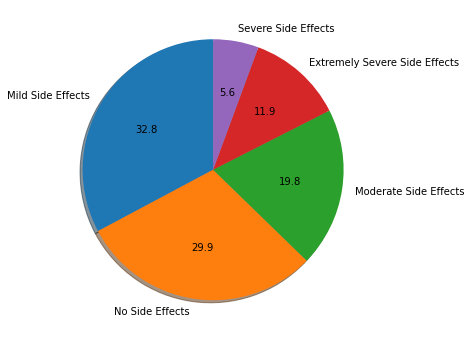

In [6]:
plt.figure(figsize = (6,6))
plt.pie(data['sideEffects'].value_counts(), startangle = 90, autopct = '%.1f', labels = ['Mild Side Effects', 'No Side Effects ','Moderate Side Effects','Extremely Severe Side Effects','Severe Side Effects'], shadow = True)
plt.show()

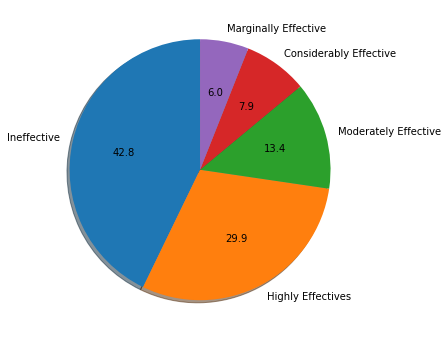

In [7]:
plt.figure(figsize = (6,6))
plt.pie(data['effectiveness'].value_counts(), startangle = 90, autopct = '%.1f', labels = ['Ineffective', 'Highly Effectives','Moderately Effective','Considerably Effective','Marginally Effective'], shadow = True)
plt.show()

In [8]:
# sns.set_style('darkgrid')
# sns.barplot(x='urlDrugName',y='rating',data=data,palette='plasma')

In [9]:
# sns.countplot(x='urlDrugName',data=data)

In [10]:
data=data.dropna(axis=0)

In [11]:
data.isna().sum()

urlDrugName      0
rating           0
effectiveness    0
condition        0
sideEffects      0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [13]:
# plt.figure(figsize = (6,6))
# plt.pie(data['sideEffects'].value_counts(), startangle = 90, autopct = '%.1f', labels = ['Mild Side Effects', 'No Side Effects ','Moderate Side Effects','Extremely Severe Side Effects','Severe Side Effects'], shadow = True)
# plt.show()

In [14]:
data.columns

Index(['urlDrugName', 'rating', 'effectiveness', 'condition', 'sideEffects'], dtype='object')

In [15]:
data['urlDrugName'] = le.fit_transform(data['urlDrugName'])
# data['sideEffects'] = le.fit_transform(drugReview['sideEffects'])
# data['Races'] = le.fit_transform(data['Races'])
data['effectiveness'] = le.fit_transform(data['effectiveness'])
# data['Gender']=le.fit_transform(data['Gender'])

In [16]:
data

,urlDrugName,rating,effectiveness,condition,sideEffects
0,166,4,1,management of congestive heart failure,Mild Side Effects
1,319,1,1,birth prevention,Severe Side Effects
2,345,10,1,menstrual cramps,No Side Effects
3,353,3,3,acid reflux,Mild Side Effects
4,259,2,3,fibromyalgia,Severe Side Effects
...,...,...,...,...,...
3102,472,10,1,adhd,Mild Side Effects
3103,493,1,2,depression,Extremely Severe Side Effects
3104,100,2,3,total hysterctomy,Moderate Side Effects
3105,445,8,0,epilepsy,Mild Side Effects


In [17]:
x=data.drop(['condition','sideEffects'],axis=1)

In [18]:
data['sideEffects']=le.fit_transform(data['sideEffects'])

In [19]:
y=data['sideEffects']

In [20]:
x

,urlDrugName,rating,effectiveness
0,166,4,1
1,319,1,1
2,345,10,1
3,353,3,3
4,259,2,3
...,...,...,...
3102,472,10,1
3103,493,1,2
3104,100,2,3
3105,445,8,0


In [21]:
y

0       1
1       4
2       3
3       1
4       4
       ..
3102    1
3103    0
3104    2
3105    1
3106    2
Name: sideEffects, Length: 3106, dtype: int32

In [22]:
# plt.figure(figsize = (6,6))
# plt.pie(data['effectiveness'].value_counts(), startangle = 90, autopct = '%.1f', labels = ['Highly effective', 'Ineffective','Considerably Effective','Moderately Effective','Marginally Effective'], shadow = True)
# plt.show()

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

<AxesSubplot:xlabel='sideEffects', ylabel='count'>

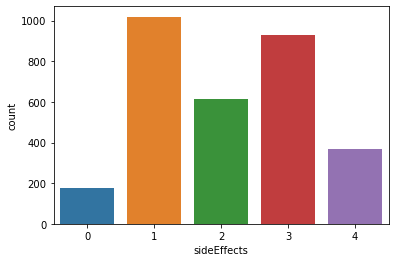

In [24]:
sns.countplot(x="sideEffects", data=data)

In [25]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_prediction=logit_model.predict(x_test)

C:\Users\DHYAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_prediction)

array([[ 18,   2,   4,   0,  10],
       [  2, 181,   4,   0,   7],
       [  3,  83,  12,   0,  19],
       [  4, 188,   2,   0,   7],
       [ 10,  29,  11,   0,  26]], dtype=int64)

In [27]:
accuracy_score(y_test,y_prediction)

0.38102893890675243

In [28]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_prediction=lr.predict(x_test)
from sklearn.metrics import  mean_squared_error
mse=mean_squared_error(y_test,y_prediction)

In [29]:
print(mse)

1.3261694520976537


In [31]:
from sklearn import preprocessing
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x_train=min_max.fit_transform(x_train)
x_test=min_max.fit_transform(x_test)

In [32]:
# from sklearn import preprocessing
# standardisation=preprocessing.StandardScaler()
# x_train=standardisation.fit_transform(x_train)
# x_test=standardisation.fit_transform(x_test)



In [33]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_prediction=logit_model.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_prediction)

array([[  1,   2,   0,   0,  31],
       [  1, 122,  14,  53,   4],
       [  1,  65,  27,  10,  14],
       [  0,  83,   4, 105,   9],
       [  3,  19,  18,   2,  34]], dtype=int64)

In [35]:
accuracy_score(y_test,y_prediction)

0.4646302250803859

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion='entropy')
dt_model.fit(x_train,y_train)
y_prediction=dt_model.predict(x_test)

In [37]:
accuracy_score(y_test,y_prediction)

0.4742765273311897

In [38]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_prediction=svm_linear.predict(x_test)

In [39]:
accuracy_score(y_test,y_prediction)

0.4405144694533762

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [41]:
y_prediction=gb.predict(x_test)

In [42]:
accuracy_score(y_test,y_prediction)

0.4887459807073955

In [75]:
from sklearn.preprocessing import Normalizer
norm=Normalizer()
x_train=norm.fit_transform(x_train)
x_test=norm.transform(x_test)

In [76]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_prediction=logit_model.predict(x_test)

C:\Users\DHYAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_prediction)

array([[  0,  34,   0,   0,   0],
       [  0, 193,   1,   0,   0],
       [  0, 116,   1,   0,   0],
       [  0, 201,   0,   0,   0],
       [  0,  75,   1,   0,   0]], dtype=int64)

In [78]:
accuracy_score(y_test,y_prediction)

0.31189710610932475

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_prediction=rf.predict(x_test)
